In [11]:
# Import the required libraries and dependencies
import numpy as np
import pandas as pd
import hvplot.pandas

In [2]:
# Read the data from the apple-price.csv file into a Pandas DataFrame
df_stock = pd.read_csv(
    "../Resources/aapl-price.csv", 
    index_col="date", 
    parse_dates=True
)

# Review the DataFrame
df_stock.head()

,close
date,
2015-10-19,27.93
2015-10-20,28.44
2015-10-21,28.44
2015-10-22,28.88
2015-10-23,29.77


In [3]:
# Read the data from the apple-trends.csv file into a Pandas DataFrame
df_trends = pd.read_csv(
    "../Resources/apple-trends.csv", 
    index_col="date", 
    parse_dates=True
)

# Review the DataFrame
df_trends.head()

,trend-worldwide
date,
2015-10-23,32
2015-10-30,33
2015-11-06,32
2015-11-13,32
2015-11-20,31


#### Step 2: Concatenate the `df_stock` DataFrame to the `df_trends` DataFrame, creating a single DataFrame named `df_apple`.

> **Rewind** Concatenation: Two DataFrames that have the same `datetime` index can be merged using `pd.concat`. The `axis=1` parameter means that we're bringing the columns of the two DataFrames together.

In [8]:
# Concatenate Apple's stock price and Google trends data
# Use a parameter of axis=1 to ensure the concatenation by columns
# Chain the dropna function to remove any rows of data that do not 
# contain information in both columns
df_apple = pd.concat([df_trends, df_stock], axis=1).dropna(how='any')


# Review the df_apple DataFrame
df_apple.head()

,trend-worldwide,close
date,,
2015-10-23,32.0,29.77
2015-10-30,33.0,29.88
2015-11-06,32.0,30.27
2015-11-13,32.0,28.09
2015-11-20,31.0,29.83


### Step 3: Create a plot of the concatenated DataFrame and analyze any trends and correlations. Do you observe any seasonal patterns?

> **Hint** You might find it useful to refer to the [Apple Events page](https://www.apple.com/apple-events/) and the [Timeline of Apple Inc. products](https://en.wikipedia.org/wiki/Timeline_of_Apple_Inc._products) to spotlight moments over time that could have triggered a particular pattern.

In [13]:
# Use hvplot to visualize the time series data in the df_apple DataFrame

plot = df_apple.hvplot.line('close', 'trend-worldwide', title='Time Series Data')
hvplot.show(plot)

Launching server at http://localhost:49506


## Building Time Trends

### Step 1: Note that on September 10, 2019, Apple organized an event where it presented the new iPhone 11 family, the Apple Watch Series 5, and a new iPad. This event gained worldwide attention.

### Step 2: Closely examine the data from March 1, 2019 to January 31, 2020.

In [14]:
# Using the df_apple DataFrame, use the loc function to select a
# range of data from March 1st, 2019 to January 31st, 2020
start_date = '2019-03-01'
end_date = '2020-01-31'
df_spotlight = df_apple.loc[start_date:end_date]

# Review the df_spotlight DataFrame
df_spotlight

,trend-worldwide,close
date,,
2019-03-01,27.0,43.74
2019-03-08,27.0,43.23
2019-03-15,27.0,46.53
2019-03-22,30.0,47.76
2019-03-29,34.0,47.49
2019-04-05,29.0,49.25
2019-04-12,27.0,49.72
2019-04-26,27.0,51.08
2019-05-03,28.0,52.94


### Step 3: Create a plot and identify whether both time series indicate a common trend that might correspond to this narrative.

<Axes: xlabel='date'>

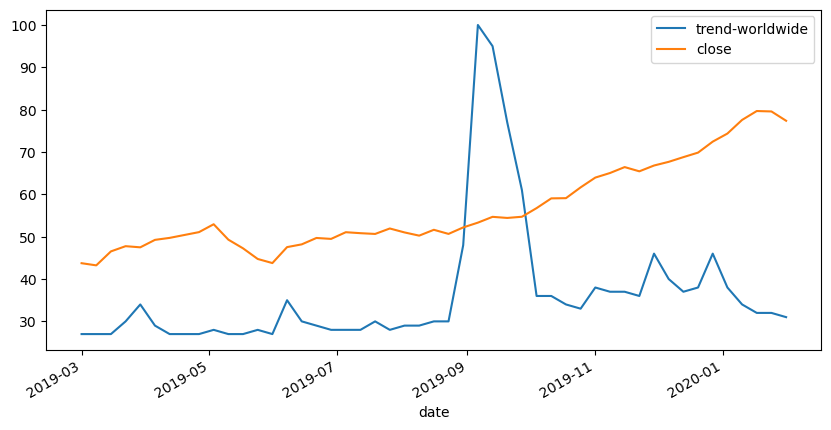

In [16]:
# Visualize the df_spotlight DataFrame
df_spotlight.plot(kind="line", figsize=(10,5))

### Step 4: Before seeking any correlations between these time series, add columns to the `df_apple` DataFrame to analyze the impact of the Google Trends data on the weekly returns and stock volatility, as follows:

1. Use the Pandas `shift` function to add a new column that lags the Google Trends data by one period.

    > **Hint** Google Trends data is reported every week on Sunday, so you have a weekly period in this time series.

2. Use the Pandas `pct_change` function to add a new column that has the weekly price returns.

3. Compute the rolling stock volatility for Apple by using the following Pandas method:

    `df_apple["weekly_volatility"] = df_apple["close"].pct_change().rolling(window=4).std()`


In [19]:
# Create a column which lags Google trends by one week
# Use the shift function, and move the data down by one row
df_apple["lagged_trends"] = df_apple['trend-worldwide'].shift(1)
df_apple.head()

,trend-worldwide,close,lagged_trends
date,,,
2015-10-23,32.0,29.77,NaN
2015-10-30,33.0,29.88,32.0
2015-11-06,32.0,30.27,33.0
2015-11-13,32.0,28.09,32.0
2015-11-20,31.0,29.83,32.0


In [22]:
# Create a column that contains the Apple weekly return data
# Use the pct_change function to calculate the weekly return values
df_apple['weekly_returns'] = df_apple['close'].pct_change()
df_apple.head()

,trend-worldwide,close,lagged_trends,weekly_returns
date,,,,
2015-10-23,32.0,29.77,NaN,NaN
2015-10-30,33.0,29.88,32.0,0.003695
2015-11-06,32.0,30.27,33.0,0.013052
2015-11-13,32.0,28.09,32.0,-0.072019
2015-11-20,31.0,29.83,32.0,0.061944


In [26]:
# Create a column of Apple weekly rolling stock volatility 
# Chain the pct_function, the rolling function and a 4 period window, and the std function 
df_apple['weekly_returns'] = df_apple['close'].pct_change().rolling(window=4).std()
df_apple.head()

,trend-worldwide,close,lagged_trends,weekly_returns
date,,,,
2015-10-23,32.0,29.77,NaN,NaN
2015-10-30,33.0,29.88,32.0,NaN
2015-11-06,32.0,30.27,33.0,NaN
2015-11-13,32.0,28.09,32.0,NaN
2015-11-20,31.0,29.83,32.0,0.055367


In [27]:
# Display the df_apple DataFrame to confirm all columns are present
df_apple.head()

,trend-worldwide,close,lagged_trends,weekly_returns
date,,,,
2015-10-23,32.0,29.77,NaN,NaN
2015-10-30,33.0,29.88,32.0,NaN
2015-11-06,32.0,30.27,33.0,NaN
2015-11-13,32.0,28.09,32.0,NaN
2015-11-20,31.0,29.83,32.0,0.055367


### Step 5: Use the Pandas `corr` function to compute the correlations among the lagged Google Trends data, the price returns, and the stock volatility. Does any predictable relationship exist?

In [29]:
# Use the corr function to compute the correlation between the lagged Google Trends data, price returns, and stock volatility
correlation_matrix = df_apple.corr()
correlation_matrix

,trend-worldwide,close,lagged_trends,weekly_returns
trend-worldwide,1.000000,0.249017,0.735369,-0.014795
close,0.249017,1.000000,0.249998,0.197668
lagged_trends,0.735369,0.249998,1.000000,0.004911
weekly_returns,-0.014795,0.197668,0.004911,1.000000
